In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
mobile = pd.read_csv("Flipkart Mobile.csv")
mobile

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [29]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [30]:
mobile.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [31]:
mobile.shape

(430, 16)

__HEATMAP__

In [47]:
numeric_value = mobile[["ROM","RAM","battery_capacity","num_of_ratings","sales","sales_price"]]
numeric_value.corr()

,ROM,RAM,battery_capacity,num_of_ratings,sales,sales_price
ROM,1.000000,0.673320,-0.112008,-0.243288,-0.219048,0.653686
RAM,0.673320,1.000000,0.198515,-0.215292,-0.190557,0.339269
battery_capacity,-0.112008,0.198515,1.000000,0.019582,-0.030358,-0.485731
num_of_ratings,-0.243288,-0.215292,0.019582,1.000000,0.950485,-0.240036
sales,-0.219048,-0.190557,-0.030358,0.950485,1.000000,-0.221278
sales_price,0.653686,0.339269,-0.485731,-0.240036,-0.221278,1.000000


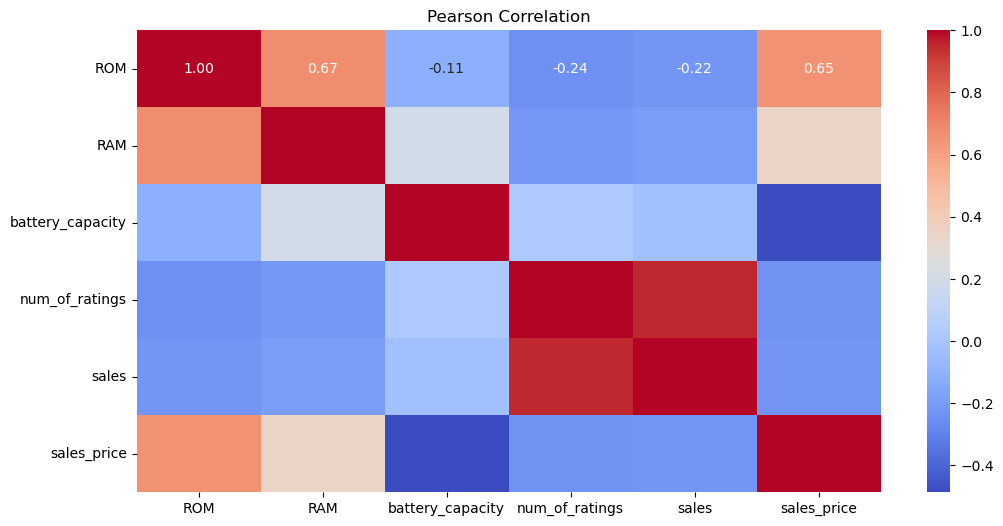

In [76]:
#heatmap correlation
plt.figure(figsize = (12,6))
sns.heatmap(numeric_value.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Pearson Correlation")
plt.show()

__INSIGHTS__
* Strong positive correlation between __ROM and RAM__, indicating that devices with higher ROM tend to also have higher RAM.
* Strong positive correlation between __ROM and sales_price__.
* Strong positive correlation between __Number of ratings and Sales__, indicating that devices with more number of ratings(users) tend to have higher Sales.

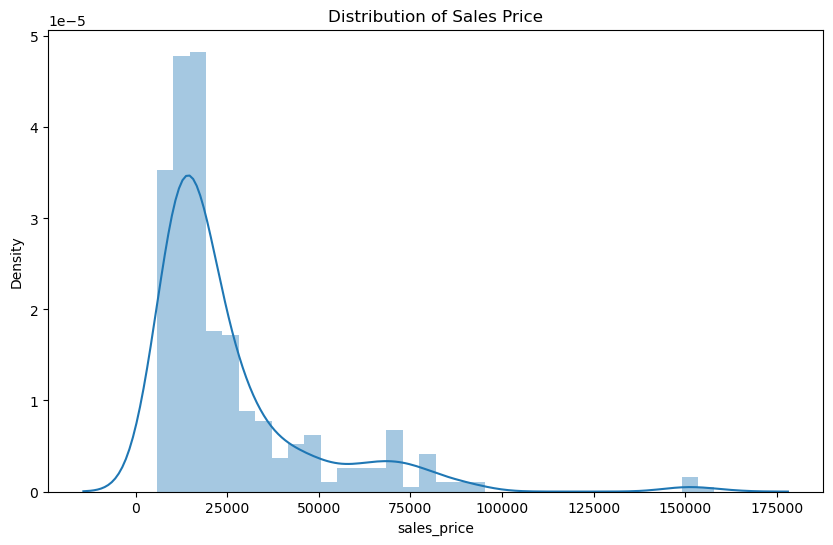

In [49]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(mobile['sales_price'])
plt.title("Distribution of Sales Price")
plt.show()

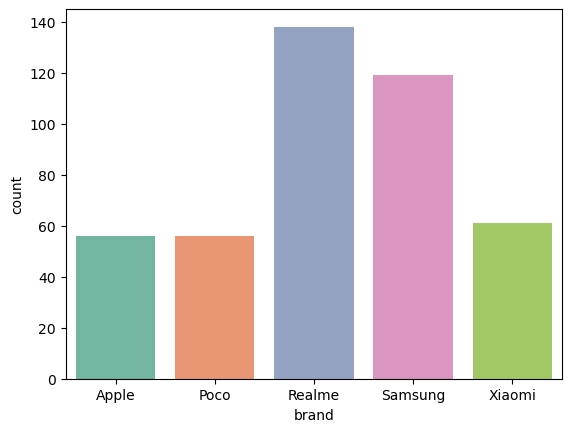

In [53]:
# Assuming 'brand' is a column in your 'mobile' DataFrame
sns.countplot(x='brand', data=mobile, palette='Set2')
plt.show()


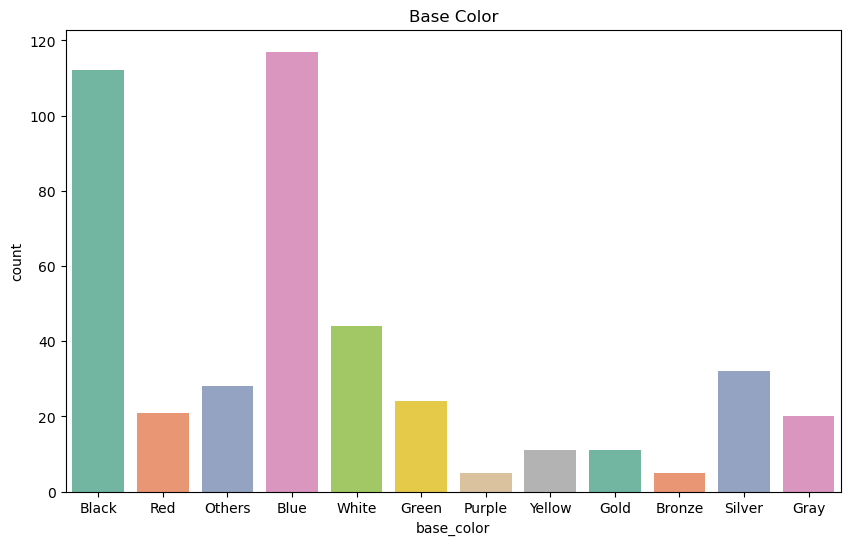

In [64]:
#visualize color
plt.figure(figsize = (10,6))
sns.countplot(x = mobile['base_color'], palette = 'Set2')
plt.title("Base Color")
plt.show()

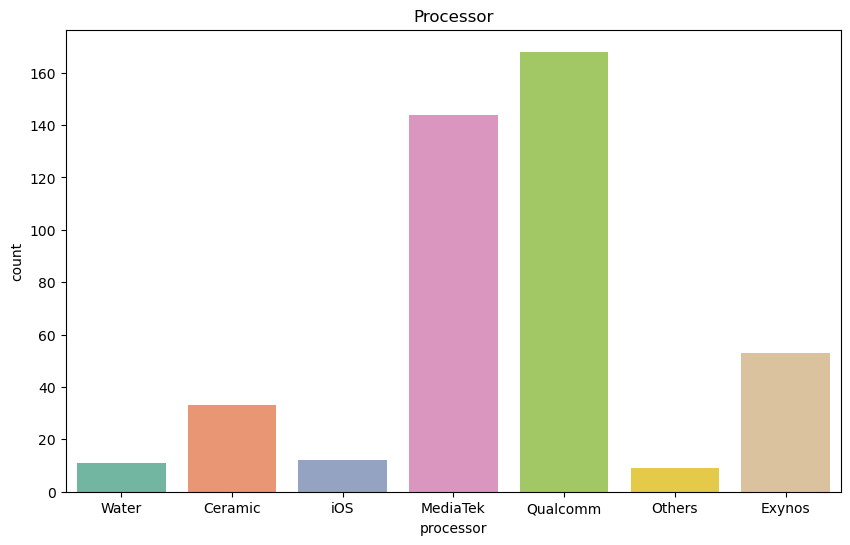

In [65]:
#visualize processor
plt.figure(figsize = (10,6))
sns.countplot(x = mobile['processor'], palette = 'Set2')
plt.title("Processor")
plt.show()

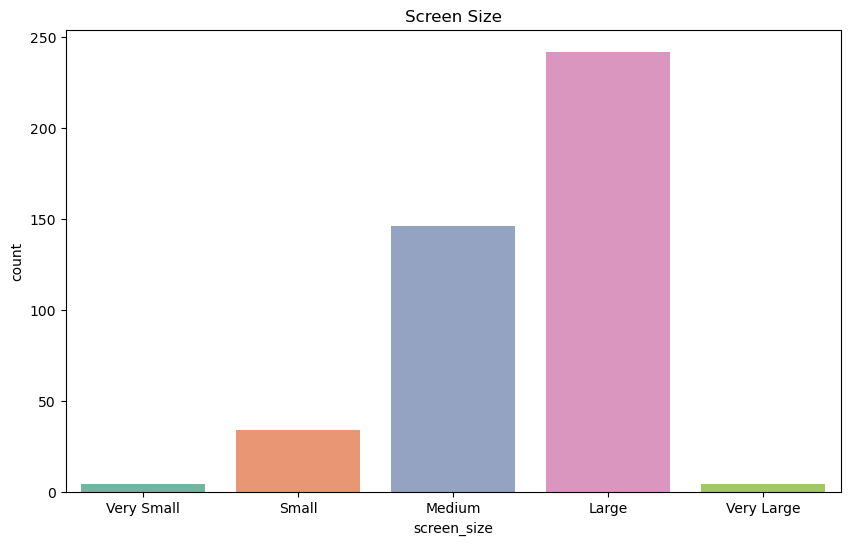

In [66]:
#visualize screen size
plt.figure(figsize = (10,6))
sns.countplot(x=mobile['screen_size'], palette = 'Set2')
plt.title("Screen Size")
plt.show()

In [67]:
#group brand & color
brand_color = mobile.groupby(['brand', 'base_color']).size().reset_index(name = 'Count')
print(brand_color)

      brand base_color  Count
0     Apple      Black     12
1     Apple       Blue      8
2     Apple       Gold      1
3     Apple      Green      6
4     Apple     Others      4
5     Apple     Purple      4
6     Apple        Red      7
7     Apple      White     11
8     Apple     Yellow      3
9      Poco      Black     17
10     Poco       Blue     18
11     Poco     Bronze      2
12     Poco       Gray      3
13     Poco      Green      2
14     Poco     Others      3
15     Poco        Red      3
16     Poco     Silver      3
17     Poco     Yellow      5
18   Realme      Black     26
19   Realme       Blue     43
20   Realme       Gray      9
21   Realme      Green      5
22   Realme     Others      9
23   Realme     Purple      1
24   Realme        Red      2
25   Realme     Silver     24
26   Realme      White     16
27   Realme     Yellow      3
28  Samsung      Black     38
29  Samsung       Blue     33
30  Samsung     Bronze      3
31  Samsung       Gold      2
32  Samsun

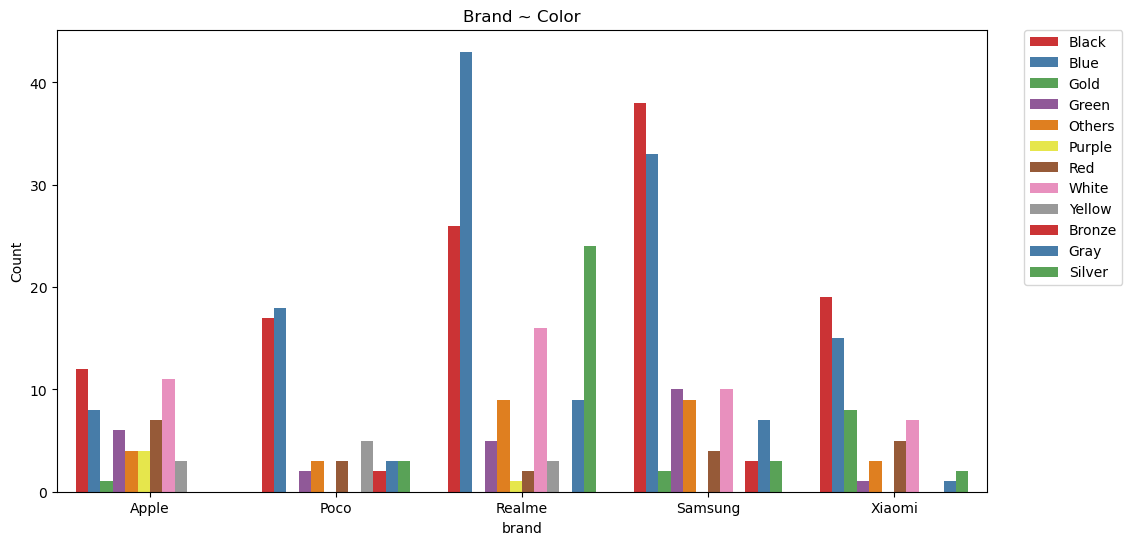

In [68]:
#viusalize brand ~ color
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'base_color', data = brand_color, palette = 'Set1')
plt.title("Brand ~ Color")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()


In [69]:
#group brand & processor
brand_processor = mobile.groupby(['brand', 'processor']).size().reset_index(name = 'Count')
print(brand_processor)

      brand processor  Count
0     Apple   Ceramic     33
1     Apple     Water     11
2     Apple       iOS     12
3      Poco  MediaTek     23
4      Poco  Qualcomm     33
5    Realme  MediaTek     91
6    Realme    Others      6
7    Realme  Qualcomm     41
8   Samsung    Exynos     53
9   Samsung  MediaTek     25
10  Samsung    Others      3
11  Samsung  Qualcomm     38
12   Xiaomi  MediaTek      5
13   Xiaomi  Qualcomm     56


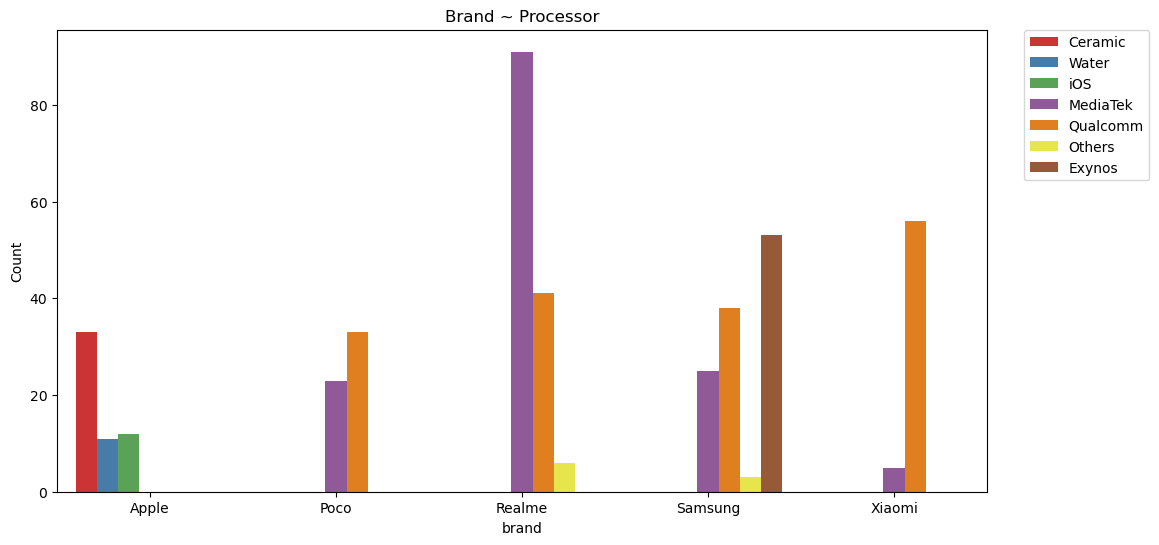

In [70]:
#viusalize brand ~ processor
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'processor', data = brand_processor, palette = 'Set1')
plt.title("Brand ~ Processor")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

In [71]:
#group brand & size
brand_size = mobile.groupby(['brand', 'screen_size']).size().reset_index(name = 'Count')
print(brand_size)

      brand screen_size  Count
0     Apple      Medium     35
1     Apple       Small     17
2     Apple  Very Small      4
3      Poco       Large     54
4      Poco      Medium      2
5    Realme       Large     82
6    Realme      Medium     56
7   Samsung       Large     82
8   Samsung      Medium     26
9   Samsung       Small      7
10  Samsung  Very Large      4
11   Xiaomi       Large     24
12   Xiaomi      Medium     27
13   Xiaomi       Small     10


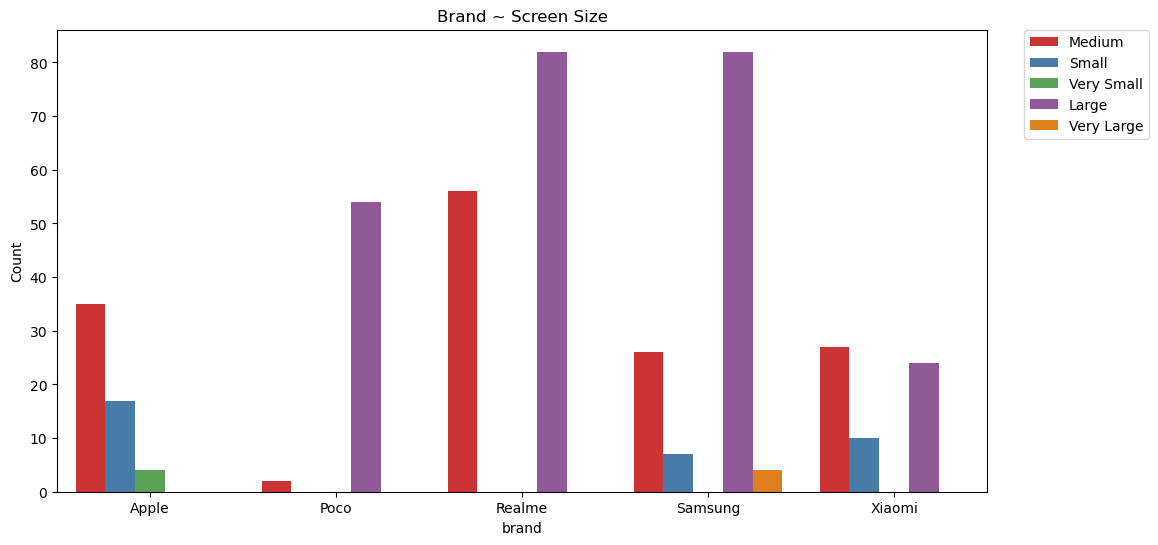

In [72]:
#viusalize brand ~ processor
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'screen_size', data = brand_size, palette = 'Set1')
plt.title("Brand ~ Screen Size")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

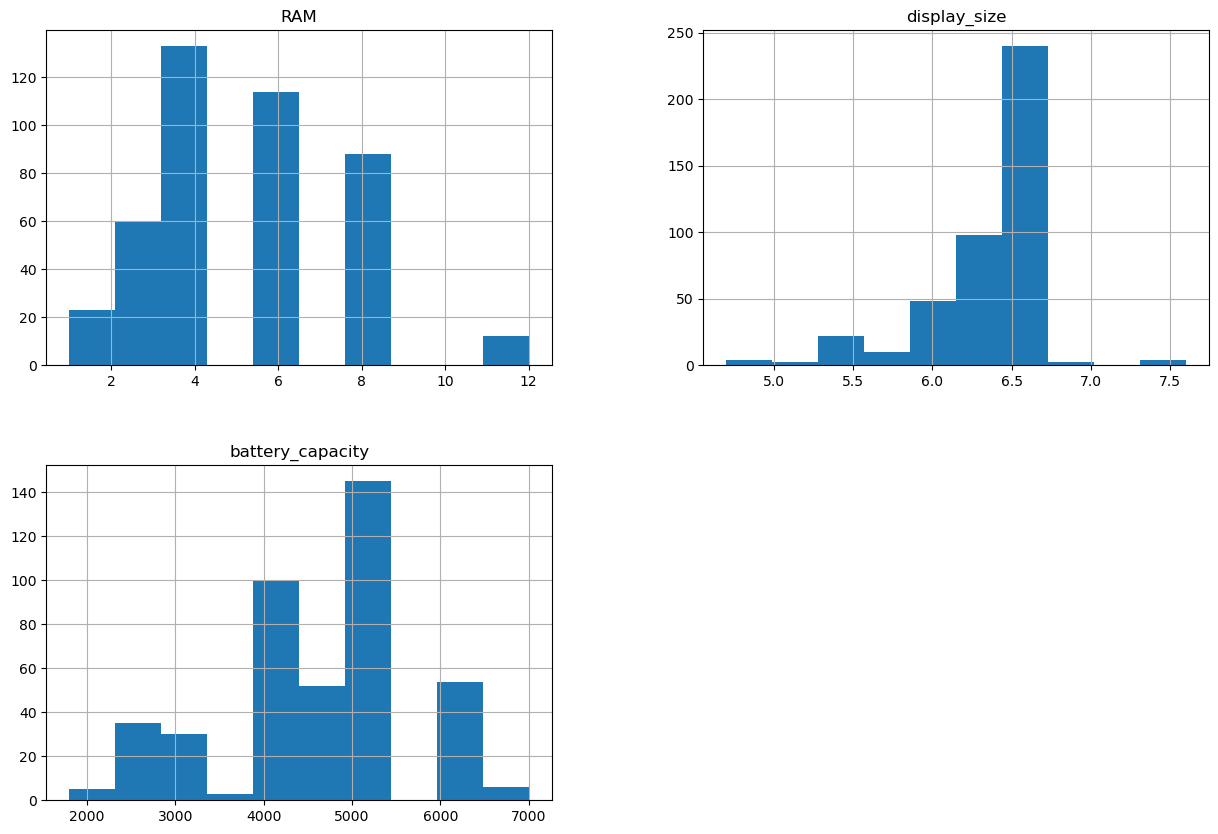

In [88]:
hist_plots = mobile[["RAM","display_size","battery_capacity"]]
hist_plots.hist(figsize = (15,10))
plt.show()

<Axes: title={'center': 'Relationship between ratings and sales'}, xlabel='ratings', ylabel='sales'>

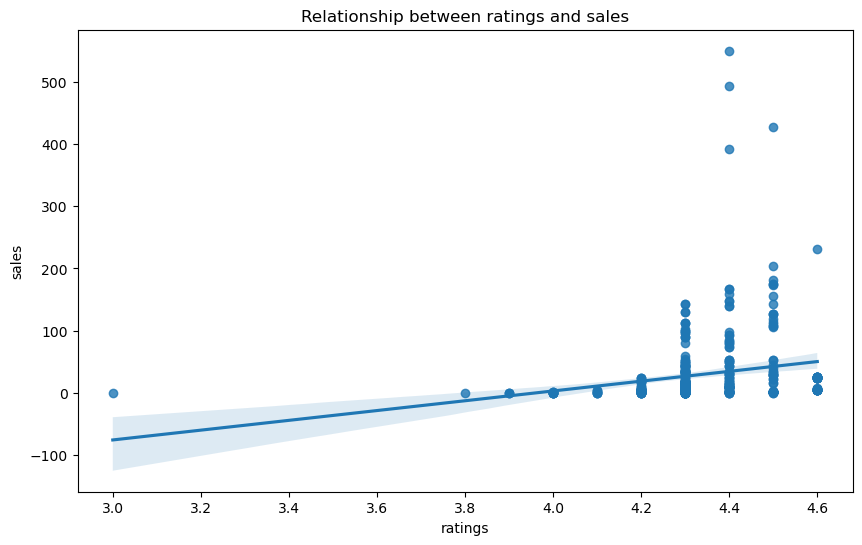

In [79]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between ratings and sales')
plt.xticks
sns.regplot(data=mobile, x=mobile['ratings'], y=mobile['sales'])

# CHI-SQUARE TEST

NULL hypothesis : there is no link between processor and brand 

ALTERNATIVE hypothesis : there is a significant link between processor and brand

In [8]:
observed = pd.crosstab(index = mobile['processor'], columns = mobile['brand'], margins = True)
observed

brand,Apple,Poco,Realme,Samsung,Xiaomi,All
processor,,,,,,
Ceramic,33,0,0,0,0,33
Exynos,0,0,0,53,0,53
MediaTek,0,23,91,25,5,144
Others,0,0,6,3,0,9
Qualcomm,0,33,41,38,56,168
Water,11,0,0,0,0,11
iOS,12,0,0,0,0,12
All,56,56,138,119,61,430


In [9]:
chi2_contingency(observed, correction = False)

Chi2ContingencyResult(statistic=675.4880690372095, pvalue=1.35007783512127e-119, dof=35, expected_freq=array([[  4.29767442,   4.29767442,  10.59069767,   9.13255814,
          4.68139535,  33.        ],
       [  6.90232558,   6.90232558,  17.00930233,  14.66744186,
          7.51860465,  53.        ],
       [ 18.75348837,  18.75348837,  46.21395349,  39.85116279,
         20.42790698, 144.        ],
       [  1.17209302,   1.17209302,   2.88837209,   2.49069767,
          1.27674419,   9.        ],
       [ 21.87906977,  21.87906977,  53.91627907,  46.49302326,
         23.83255814, 168.        ],
       [  1.43255814,   1.43255814,   3.53023256,   3.04418605,
          1.56046512,  11.        ],
       [  1.5627907 ,   1.5627907 ,   3.85116279,   3.32093023,
          1.70232558,  12.        ],
       [ 56.        ,  56.        , 138.        , 119.        ,
         61.        , 430.        ]]))

### Insights :
* pvalue < alpha value : Reject NULL HYPOTHESIS, so __we have enough evidence to support ALTERNATE Hypothesis__there is no link between base_color and brand__
 

# ONE-WAY ANOVA 
- Null Hypothesis: Sales Means of the brands are equal
- Alternative Hypothesis: Sales Means of the brands are not equal

In [4]:
# f statistic is the ratio of the variance between the groups to the variance within the groups.

stats.f_oneway(mobile['sales'][mobile['brand'] == 'Apple'],
               mobile['sales'][mobile['brand'] == 'Poco'],
               mobile['sales'][mobile['brand'] == 'Realme'],
               mobile['sales'][mobile['brand'] == 'Samsung'],
               mobile['sales'][mobile['brand'] == 'Xiaomi'])

F_onewayResult(statistic=9.38577014952933, pvalue=2.812035956706985e-07)

### Insights:
- pvalue < alpha value : Reject NULL HYPOTHESIS, so we have enough evidence to support ALTERNATE HYPOTHESIS which is Sales Means of the brands are not equal.